Лабораторная работа 1

Вариант 22
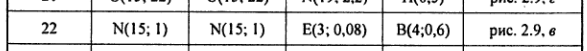

In [229]:
import numpy as np
import pandas as pd
import scipy
import math
from numpy.random import Generator, PCG64
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [230]:
rng = Generator(PCG64(seed=42))

x1 = rng.normal(loc=15, scale=1, size=1000)
x2 = rng.normal(loc=15, scale=1, size=1000)

x3 = rng.gamma(shape=3, scale=12.5, size=1000) # значит, λ = 1 / 0.08 = 12.5
ff.create_distplot(
    [x1, x2, x3],
    ["x1", "x2", "x3"],
    show_hist=False
)


In [231]:
V = rng.binomial(4,0.6, size=1000)
ff.create_distplot([V], ["V"], show_hist=True, curve_type="normal")

In [232]:
df = pd.DataFrame({
    "X1": x1, "X2":x2, "X3":x3, "V":V
})
df.head()

,X1,X2,X3,V
0,15.304717,14.940717,24.932833,3
1,13.960016,14.270713,43.000551,2
2,15.750451,14.585527,31.447327,2
3,15.940565,15.633910,63.963942,3
4,13.048965,15.002993,13.610482,1


определение времени безотказной работы системы

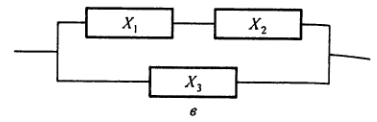

Данная схема является иллюстрацией системы с включенным резервированием, отказ которой произойдет при отказе элементов X1,X3 или X2,X3.
В таком случае вероятность отказа всей системы будет равна:
P(t) = 1-(1-X3)(1-X1*X2)
В таком случае время отказа системы будет = Y = max(X3, min(X1, X2))

In [233]:
df["X1X2"] = df.loc[:,["X1","X2"]].min(axis=1)
df["Y"] = df.loc[:,["X1X2","X3"]].max(axis=1)
df = df.drop("X1X2",axis=1)
df["Z"] = df["Y"].div((1 + 0.1 * df.V), axis="index")
ff.create_distplot([df["Z"], df["Y"]], ["Z", "Y"], show_hist=False, curve_type="kde")

In [234]:
df

,X1,X2,X3,V,Y,Z
0,15.304717,14.940717,24.932833,3,24.932833,19.179102
1,13.960016,14.270713,43.000551,2,43.000551,35.833793
2,15.750451,14.585527,31.447327,2,31.447327,26.206106
3,15.940565,15.633910,63.963942,3,63.963942,49.203032
4,13.048965,15.002993,13.610482,1,13.610482,12.373165
...,...,...,...,...,...,...
995,15.352720,15.392011,58.541708,2,58.541708,48.784756
996,15.766823,15.303837,21.753908,2,21.753908,18.128257
997,15.121178,14.908460,38.773587,2,38.773587,32.311322
998,15.130764,14.469178,39.229538,1,39.229538,35.663216


Статистическая обработка

In [235]:
def calculate_statistics(df):
    stats = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        data = df[column].dropna()
        stats[column] = {
            'Выборочное среднее': np.mean(data),
            'Выборочная дисперсия': np.var(data, ddof=1),
            'Среднеквадратичное отклонение': np.std(data, ddof=1),
            'Минимальное значение': np.min(data),
            'Максимальное значение': np.max(data),
            'Размах выборки': np.max(data) - np.min(data),
            'Асимметрия': scipy.stats.skew(data),
            'Эксцесс': scipy.stats.kurtosis(data)
        }
    return pd.DataFrame(stats)

# Вычисляем статистики
stats_df = calculate_statistics(df)
stats_df

,X1,X2,X3,V,Y,Z
Выборочное среднее,14.971108,14.918622,38.606481,2.428000,39.045312,31.622868
Выборочная дисперсия,0.978550,1.029295,494.120086,0.921738,469.829136,315.426255
Среднеквадратичное отклонение,0.989217,1.014542,22.228812,0.960072,21.675542,17.760244
Минимальное значение,11.351587,11.952367,2.397893,0.000000,12.549128,9.591051
Максимальное значение,18.178854,17.914245,142.908249,4.000000,142.908249,119.090208
Размах выборки,6.827267,5.961877,140.510356,4.000000,130.359121,109.499156
Асимметрия,-0.043688,-0.047894,1.228849,-0.324500,1.362955,1.387698
Эксцесс,0.085432,-0.077613,2.238881,-0.243486,2.512355,2.666159


In [236]:
stats_df.loc[:,'Z']

Выборочное среднее                31.622868
Выборочная дисперсия             315.426255
Среднеквадратичное отклонение     17.760244
Минимальное значение               9.591051
Максимальное значение            119.090208
Размах выборки                   109.499156
Асимметрия                         1.387698
Эксцесс                            2.666159
Name: Z, dtype: float64

In [237]:
math.ceil(stats_df.loc["Максимальное значение","Z"])

120

In [238]:
max_x = math.ceil(stats_df.loc["Максимальное значение","Z"])
min_x = math.floor(stats_df.loc["Минимальное значение","Z"])
r = max_x - min_x
k = 10
h = r / k # шаг

pd.DataFrame({
    "n": [1000],
    "Xmax": [max_x],
    "Xmin": [min_x],
    "R": [r],
    "k": [k],
    "h": [h],
})

,n,Xmax,Xmin,R,k,h
0,1000,120,9,111,10,11.1


In [239]:
# Разбиение на 10 групп
bins = np.linspace(min_x, max_x, k + 1)  # Границы интервалов
df['interval'] = pd.cut(df['Z'], bins, right=False)  # Группировка

In [240]:
df.loc[:,["Z", "interval"]].sort_values("Z")

,Z,interval
691,9.591051,"[9.0, 20.1)"
134,9.663710,"[9.0, 20.1)"
477,9.685325,"[9.0, 20.1)"
736,9.736904,"[9.0, 20.1)"
703,9.749714,"[9.0, 20.1)"
...,...,...
164,106.452944,"[97.8, 108.9)"
711,108.423331,"[97.8, 108.9)"
567,108.782736,"[97.8, 108.9)"
949,112.354385,"[108.9, 120.0)"


In [241]:
freq_table = df['interval'].value_counts().sort_index()
rel_freq = freq_table / freq_table.sum()  # Относительные частоты
cum_freq = freq_table.cumsum()  # Накопленные частоты
cum_rel_freq = rel_freq.cumsum()  # Накопленные относительные частоты
midpoints = [(bins[i] + bins[i+1]) / 2 for i in range(k)]  # Середины интервалов

In [242]:
# Таблица частот
stat_df_fr = pd.DataFrame({
    'Границы интервала': [f"[{bins[i]:.1f}, {bins[i+1]:.1f})" for i in range(k)],
    'Частота': freq_table.values,
    'Середины интервалов': midpoints,
    'Относительная частота': rel_freq.values,
    'Накопленная частота': cum_freq.values,
    'Накопленная относительная частота': cum_rel_freq.values
})

stat_df_fr

,Границы интервала,Частота,Середины интервалов,Относительная частота,Накопленная частота,Накопленная относительная частота
0,"[9.0, 20.1)",303,14.55,0.303,303,0.303
1,"[20.1, 31.2)",273,25.65,0.273,576,0.576
2,"[31.2, 42.3)",207,36.75,0.207,783,0.783
3,"[42.3, 53.4)",105,47.85,0.105,888,0.888
4,"[53.4, 64.5)",62,58.95,0.062,950,0.950
5,"[64.5, 75.6)",24,70.05,0.024,974,0.974
6,"[75.6, 86.7)",11,81.15,0.011,985,0.985
7,"[86.7, 97.8)",7,92.25,0.007,992,0.992
8,"[97.8, 108.9)",6,103.35,0.006,998,0.998
9,"[108.9, 120.0)",2,114.45,0.002,1000,1.000


In [243]:
freq_table = df['interval'].value_counts().sort_index()

In [244]:
# Полигон частот и кумулята
fig = go.Figure()
fig.add_traces([
    go.Scatter(x=midpoints, y=freq_table,  marker=dict(color="blue"), mode='lines+markers', name='Полигон частот', legendgroup = "Полигон частот",),
    go.Bar(x=midpoints, y=freq_table, width=2, marker=dict(color="blue"),opacity=0.3, name='Полигон частот 0', showlegend=False, legendgroup = "Полигон частот")
])
fig.add_trace(go.Scatter(x=midpoints, y=cum_freq, mode='lines+markers', name='Кумулята', line=dict(dash='dash')))
fig.update_layout(title="Полигон частот и Кумулята", xaxis_title="Значение Z", yaxis_title="Частота", template="plotly_white")
fig.show()

In [245]:
# Гистограмма плотностей относительных частот
fig = go.Figure()
fig.add_trace(
    go.Bar(x=midpoints, y=rel_freq, width=h * 0.9, marker=dict(color='blue'), opacity=0.5, name='Относительная частота', legendgroup = "1", showlegend=False)
)
fig.add_trace(
    go.Scatter(x=midpoints, y=rel_freq,  marker=dict(color="blue"), mode='lines+markers', name='Относительная частота', legendgroup = "1")
)
fig.update_layout(title="Гистограмма плотностей относительных частот", xaxis_title="Значение Z", yaxis_title="Плотность", template="plotly_white")
fig.show()

In [246]:
def optimized_gamma_parameters(m, sig):
    """
    Оптимизированные параметры гамма-распределения
    с коррекцией на асимптотическое смещение
    """
    alf = ((m**2) / (sig**2)) 
    bet = ((sig**2) / m) 
    
    return alf, bet

In [247]:
m = stats_df.loc["Выборочное среднее",'Z']
sig = stats_df.loc["Среднеквадратичное отклонение",'Z']
a = m - sig * math.sqrt(3)
b = m + sig * math.sqrt(3)
alf, bet = optimized_gamma_parameters(m, sig)
sigma_ln = math.sqrt(math.log(1 + (sig**2 / m**2)))
mu_ln = math.log(m) - 0.5 * sigma_ln**2

def weibull_params_correct(m, sig):
    """Правильная оценка параметров Вейбулла методом моментов"""
    
    def equation(k):
        gamma1 = scipy.special.gamma(1 + 1/k)
        gamma2 = scipy.special.gamma(1 + 2/k)
        return (sig/m)**2 - (gamma2/gamma1**2 - 1)
    
    # Используем более надежный численный метод
    shape_wbl = scipy.optimize.fsolve(equation, 2.0)[0]  # начальное приближение k=2
    scale_wbl = m / scipy.special.gamma(1 + 1/shape_wbl)
    
    return shape_wbl, scale_wbl
shape_wbl, scale_wbl = weibull_params_correct(m, sig)

In [248]:
print("параметры распределения вейбулла")
print(f"scale_wbl: {scale_wbl}; shape: {shape_wbl}")

параметры распределения вейбулла
scale_wbl: 35.60046939207797; shape: 1.8469814216943854


In [249]:
print("параметры равномерного распределения")
print(f"a: {a}; b: {b}")

параметры равномерного распределения
a: 0.8612236200993699; b: 62.384512384007095


In [250]:
print("параметры нормального распределения")
print(f"m: {m}; sig: {sig}")

параметры нормального распределения
m: 31.62286800205323; sig: 17.7602436646366


In [251]:
print("параметры гамма-распределения")
print(f"alfa: {alf}; beta: {bet}")

параметры гамма-распределения
alfa: 3.170331463336318; beta: 9.974625167040013


In [252]:
print("параметры логнормального распределения")
print(f"mu_ln: {mu_ln}; sigma_ln: {sigma_ln}")

параметры логнормального распределения
mu_ln: 3.316800842183956; sigma_ln: 0.5236023064051554


In [253]:
raspred_df = pd.DataFrame({
    "равномерное": rng.uniform(low=a, high=b, size=1000),
    "нормальное": rng.normal(loc=m, scale=sig, size=1000),
    "гамма-распределение": rng.gamma(shape=alf, scale=bet, size=1000),
    "логнормальное": rng.lognormal(mean=mu_ln, sigma=sigma_ln, size=1000),
    "вейбулла": rng.weibull(shape_wbl, 1000) * scale_wbl
})

In [254]:
ff.create_distplot(
    [raspred_df["равномерное"], raspred_df["нормальное"], raspred_df["гамма-распределение"], raspred_df["логнормальное"], raspred_df["вейбулла"]],
    ["равномерное", "нормальное", "гамма-распределение", "логнормальное", "вейбулла"],
    show_hist=False
)

In [255]:
raspred_df["interval_равномерное"] = pd.cut(raspred_df["равномерное"], bins, right=False)
raspred_df["interval_нормальное"] = pd.cut(raspred_df["нормальное"], bins, right=False)
raspred_df["interval_гамма-распределение"] = pd.cut(raspred_df["гамма-распределение"], bins, right=False)
raspred_df["interval_логнормальное"] = pd.cut(raspred_df["логнормальное"], bins, right=False)
raspred_df["interval_вейбулла"] = pd.cut(raspred_df["вейбулла"], bins, right = False)

raspred_df_uniform_freq =  raspred_df["interval_равномерное"].value_counts().sort_index()
raspred_df_normal_freq =  raspred_df["interval_нормальное"].value_counts().sort_index()
raspred_df_gamma_freq =  raspred_df["interval_гамма-распределение"].value_counts().sort_index()
raspred_df_log_freq = raspred_df["interval_логнормальное"].value_counts().sort_index()
raspred_df_weib_freq = raspred_df["interval_вейбулла"].value_counts().sort_index()

raspred_df_uniform_freq_dense =  raspred_df_uniform_freq / raspred_df_uniform_freq.sum() / h
raspred_df_normal_freq_dense =  raspred_df_normal_freq / raspred_df_normal_freq.sum() / h
raspred_df_gamma_freq_dense =  raspred_df_gamma_freq / raspred_df_gamma_freq.sum() / h
rapsred_df_log_freq_dense = raspred_df_log_freq / raspred_df_log_freq.sum() / h
rapsred_df_log_weib_dense = raspred_df_weib_freq / raspred_df_weib_freq.sum() / h

raspred_df_stats = stat_df_fr[['Середины интервалов', 'Относительная частота']]

raspred_df_stats['Плотность относительной частоты'] = raspred_df_stats['Относительная частота'] / h
raspred_df_stats['Плотность равномерного распределения'] = raspred_df_uniform_freq_dense.values
raspred_df_stats['Плотность нормального распределения'] = raspred_df_normal_freq_dense.values
raspred_df_stats['Плотность гамма-распределения'] = raspred_df_gamma_freq_dense.values
raspred_df_stats['Плотность логнормального распределения'] = rapsred_df_log_freq_dense.values
raspred_df_stats['Плотность распределения вейбулла'] = rapsred_df_log_weib_dense.values
raspred_df_stats

,Середины интервалов,Относительная частота,Плотность относительной частоты,Плотность равномерного распределения,Плотность нормального распределения,Плотность гамма-распределения,Плотность логнормального распределения,Плотность распределения вейбулла
0,14.55,0.303,0.027297,0.020196,0.014579,0.023374,0.025148,0.019526
1,25.65,0.273,0.024595,0.017341,0.027650,0.026686,0.030859,0.024166
2,36.75,0.207,0.018649,0.019773,0.018501,0.019116,0.017042,0.019719
3,47.85,0.105,0.009459,0.017976,0.015786,0.010504,0.008198,0.013146
4,58.95,0.062,0.005586,0.014804,0.010055,0.006435,0.004053,0.008120
5,70.05,0.024,0.002162,0.000000,0.003016,0.002177,0.002211,0.003770
6,81.15,0.011,0.000991,0.000000,0.000402,0.001419,0.001382,0.001063
7,92.25,0.007,0.000631,0.000000,0.000101,0.000284,0.000645,0.000580
8,103.35,0.006,0.000541,0.000000,0.000000,0.000095,0.000276,0.000000
9,114.45,0.002,0.000180,0.000000,0.000000,0.000000,0.000276,0.000000


In [256]:
# Гистограмма плотностей относительных частот разных распределений
fig = go.Figure()
fig.add_trace(
    go.Bar(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_stats['Плотность относительной частоты'],
           opacity=0.5, name='Относительная частота',
          )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_stats['Плотность равномерного распределения'],
           opacity=0.9, name='Равномерное распределение',
          )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_stats['Плотность нормального распределения'],
           opacity=0.9, name='Нормальное распределение',
          )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_stats['Плотность гамма-распределения'],
           opacity=0.9, name='Гамма-распределение',
          )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_stats['Плотность логнормального распределения'],
           opacity=0.9, name='Логнормальное-распределение',
          )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_stats['Плотность распределения вейбулла'],
           opacity=0.9, name='Вейбулла-распределение',
          )
)
fig.update_layout(
    title="Гистограмма плотностей относительных частот разных распределений",
    xaxis_title="Значение Z",
    yaxis_title="Плотность",
    template="plotly_white"
)
fig.show()

In [257]:
# Гистограмма плотностей относительных частот разных распределений
fig = go.Figure()
fig.add_trace(
    go.Bar(x=raspred_df_stats['Середины интервалов'],
           y=freq_table,
           opacity=0.5, name='Относительная частота',
          )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_uniform_freq,
           opacity=0.9, name='Равномерное распределение',
          )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_normal_freq,
           opacity=0.9, name='Нормальное распределение',
          )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_gamma_freq,
           opacity=0.9, name='Гамма-распределение',
          )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_log_freq,
           opacity=0.9, name='Логнормальное-распределение',
        )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_weib_freq,
           opacity=0.9, name='Вейбулла-распределение',
        )
)
fig.update_layout(
    title="Гистограмма плотностей относительных частот разных распределений",
    xaxis_title="Значение Z",
    yaxis_title="Плотность",
    template="plotly_white"
)
fig.show()

Подбор распределения на основе χ²

In [258]:
def merge_intervals(arr1: np.ndarray, arr2: np.ndarray, threshold: int = 5):
    """
    Объединяет смежные интервалы (пары элементов из arr1 и arr2)
    на основе условия.

    Args:
        arr1: Первый numpy массив.
        arr2: Второй numpy массив.
        threshold: Пороговое значение для условия объединения. По умолчанию 5.

    Returns:
        Кортеж, содержащий два numpy массива (new_arr1, new_arr2)
        с объединенными интервалами.

    Raises:
        ValueError: Если входные массивы имеют разную длину.
    """
    
    if len(arr1) != len(arr2):
        raise ValueError("Входные массивы должны иметь одинаковую длину.")
    # Обработка случая с пустыми массивами
    if len(arr1) == 0:
        # Возвращаем пустые массивы соответствующего типа данных, если возможно,
        # или просто пустые массивы numpy
        return np.array([]), np.array([])
        # Альтернативно, можно сохранить dtype:
        # return np.array([], dtype=arr1.dtype), np.array([], dtype=arr2.dtype)

    # Используем списки Python для эффективного построения результата
    new_arr1 = []
    new_arr2 = []

    tmp_elem1 = 0
    tmp_elem2 = 0

    # Итерация по всем элементам, начиная с первого (индекс 0)
    for elem1, elem2 in zip(arr1.tolist(),arr2.tolist()):
        should_merge = (elem1 <= threshold) or (elem2 <= threshold)

        if should_merge:
            tmp_elem1 += elem1
            tmp_elem2 += elem2
            if tmp_elem1 >= threshold and tmp_elem2 >= threshold:
                new_arr1.append(tmp_elem1)
                new_arr2.append(tmp_elem2)
                tmp_elem1 = 0
                tmp_elem2 = 0
        else:
            new_arr1.append(elem1 + tmp_elem1)
            new_arr2.append(elem2 + tmp_elem2)
            tmp_elem1 = 0
            tmp_elem2 = 0

    if tmp_elem1 != 0 or tmp_elem2 != 0:
        new_arr1[-1] += tmp_elem1
        new_arr2[-1] += tmp_elem2

    # Преобразуем списки обратно в numpy массивы
    return np.array(new_arr1, dtype=arr1.dtype), np.array(new_arr2, dtype=arr2.dtype)

In [259]:
print(f"вейбулла распределение: {scipy.stats.chisquare(*merge_intervals(raspred_df_weib_freq.values, freq_table.values), ddof=2, sum_check=False)}")

вейбулла распределение: Power_divergenceResult(statistic=np.float64(67.38170643054934), pvalue=np.float64(3.589787127058518e-13))


In [260]:
print(f"равномерное распределение: {scipy.stats.chisquare(*merge_intervals(raspred_df_uniform_freq.values, freq_table.values), sum_check=False, ddof=2)}")

равномерное распределение: Power_divergenceResult(statistic=np.float64(134.0899488419936), pvalue=np.float64(7.633743612610209e-30))


In [261]:
print(f"нормальное распределение: {scipy.stats.chisquare(*merge_intervals(raspred_df_normal_freq.values, freq_table.values), ddof=2, sum_check = False)}")


нормальное распределение: Power_divergenceResult(statistic=np.float64(152.4638885086665), pvalue=np.float64(6.035096705914435e-32))


In [262]:
print(f"гамма распределение: {scipy.stats.chisquare(*merge_intervals(raspred_df_gamma_freq.values, freq_table.values), ddof=2, sum_check = False)}")

гамма распределение: Power_divergenceResult(statistic=np.float64(13.617095582491066), pvalue=np.float64(0.008622943434224144))


In [263]:
print(f"логнормальное распределение: {scipy.stats.chisquare(*merge_intervals(raspred_df_log_freq.values, freq_table.values), ddof=2, sum_check = False)}")

логнормальное распределение: Power_divergenceResult(statistic=np.float64(29.007494505750373), pvalue=np.float64(6.063857970580131e-05))


Основываясь на показателе χ²выч и значении pvalue можно предположить, что гипотеза о гамма распределении является верной.
проведём проверку критическим значением χ² с уровнем значимости 0.01

In [264]:
k1 = len(merge_intervals(raspred_df_gamma_freq.values, freq_table.values)[0])
ddof = 2
f_degree = k1 - ddof - 1
f_degree

4

По таблице χ²крит(4,0.01) = 13,28
Вычисленный: 9.828410353860471

Определение характеристик надёжности системы
Построим график функции вероятности безотказной работы

In [265]:
times = np.arange(0, 55, 1)
dist = scipy.stats.Uniform(a=a, b=b)
Pt = 1 - dist.cdf(times)

In [266]:
px.line(x=times, y=Pt,
        title='Вероятность безотказной работы', markers=True,
        labels={"x": "t", "y": "P(t)"}, range_y=[0,1.1], range_x=[-0.1,55.1])

In [267]:
m

np.float64(31.62286800205323)

In [268]:
1 - dist.cdf(m)

np.float64(0.5)

Вероятность достижения среднего времени наработки на отказ: 50%